In [86]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import signal
from playsound import playsound
import wavio

class SpeechProcessing(object):
    
    def __init__(self):   
        import numpy as np
    
    def window(self, x, fs, window_dur_in_second, frame_shift):
        import numpy as np
        sound_length = len(x)
        window_length = int(fs*window_dur_in_second)
        shift_length = int(fs*frame_shift)
        num_window = int((sound_length-window_length)/shift_length + 1)

        print("Sound length", sound_length)
        print("Sampling Rate:", fs)
        print("Window length", window_length)
        print("Shift length:",shift_length)
        print("Num window: ",num_window)

        windowed_data = []

        for i in range(int(num_window)):
            window = [0.54-0.46*np.cos((2*3.14*i)/(window_length-1)) for i in range(window_length)]#applying Hamming window
            frame = x[(i*shift_length):(i*shift_length)+window_length]*window
            windowed_data.append(frame)

        return windowed_data
    
    
    def shortTimeZeroCrossing(self, windowed_data, frame_shift, fs):
        
        shift_length = int(fs*frame_shift)
        
        import numpy as np
        zc_vector = []
        
        for frame in (windowed_data):
            sum = 0
            for i in range(len(frame)-1):
                first_element = frame[i]
                second_element = frame[i+1]
                element = np.abs(np.sign(first_element)-np.sign(second_element))
                sum = sum + element
            zc = (shift_length*sum)/(len(frame)*2)
            zc_vector.append(zc)#her window için tek bir zc değeri
    
        zc_vector = np.array(zc_vector).reshape((len(windowed_data),1))
        zc_vector = zc_vector/max(zc_vector)

        
        return zc_vector
    
    
    def shortTimeEnergy(self, windowed_data):
        import numpy as np
        energy_Vector = []
        sum = 0
        for frame in (windowed_data):
            sum = 0
            for i in range(len(frame)):
                sum = sum + frame[i]*frame[i]
            energy_Vector.append(sum)
        
        energy_Vector = np.array(energy_Vector).reshape((len(windowed_data),1))
        energy_Vector = energy_Vector/max(energy_Vector)
        
        return energy_Vector
    
    
   
    
    
    
    def STFT(self, data, N, fs, window_dur_in_second, frame_shift, plot):
        
        windowed_data = self.window(data,fs, window_dur_in_second , frame_shift = frame_shift )
        
        print("FFT N: ",N)
        import numpy as np
        
        STFT = []
        dft_frame = []
        
        for i,frame in enumerate(windowed_data):            
            
            dft_frame = np.fft.fft(frame,N)
            STFT.append(dft_frame)
            
            if plot==True:
                f = np.arange(0,fs/2,fs/N)
                plt.plot(f,20*np.log10(np.abs(dft_frame[:int(len(dft_frame)/2)])))
                plt.grid(True)
                plt.title("FFT of Frame: {}".format(i))
                plt.xlabel("Freqency(Hz)")
                plt.figure()
                
    
        STFT = np.array(STFT)
        return STFT
    

        
        
        
    def cepstrum(self, data, N, fs, window_dur_in_second, frame_shift, lp_liftering, plot, cutoff):
        windowed_data = self.window(data,fs, window_dur_in_second , frame_shift = frame_shift )
        
        import numpy as np
        
        cepstrum = []
                
        for i,frame in enumerate(windowed_data):     
            
            dft_frame = np.fft.fft(frame,N)
            
            ceps_frame = np.real(np.fft.ifft(np.log10(np.abs(np.fft.fft(frame,N))))).reshape((N,1)).ravel()
            #print(ceps_frame.shape)
            
            if lp_liftering == True:
                ones = np.ones((1,cutoff))
                zeros = np.zeros((1,(1024-(2*cutoff))))
                lif = np.concatenate((ones,zeros,ones),axis=1).ravel()
                ceps_frame = ceps_frame*lif
            
            cepstrum.append(ceps_frame)
            
            if plot==True:
                ceps_frame = ceps_frame/max(ceps_frame)
                f = np.arange(0,N,1)
                plt.plot(ceps_frame)
                
                scale_factor = 0.05
                ymin, ymax = plt.ylim()
                plt.ylim(ymin * scale_factor, ymax * scale_factor)
                
                plt.grid(True)
                plt.title("Cepstrum of Frame: {}: ".format(i))
                plt.xlabel("Quefrency (Sample Id)")
                plt.figure()
                

                

                
                f = np.arange(0,fs/2,fs/N)
                plt.plot(f,20*np.log10(np.abs(dft_frame[:int(len(dft_frame)/2)])))
                plt.grid(True)
                plt.title("FFT of Frame: {} Before Cepstrum Operation: ".format(i))
                plt.xlabel("Freqency(Hz)")
                plt.figure()
                
                
                dft_frame = np.fft.fft(ceps_frame,N)
                f = np.arange(0,fs/2,fs/N)
                plt.plot(f,20*np.log10(np.abs(dft_frame[:int(len(dft_frame)/2)])))
                plt.grid(True)
                plt.title("FFT of Frame: {} After Cepstrum Operation".format(i))
                plt.xlabel("Freqency(Hz)")
                plt.figure()
                
        return cepstrum
        
    def shortTimeSpectralEnvelope(self,real_cepstrum, N):
        
        SpectralEnvelope = []
        
        for i,frame in enumerate(real_cepstrum):     
            
            dft_frame = np.fft.fft(frame,N)
            
            SpectralEnvelope.append(dft_frame)
            
        return SpectralEnvelope
        

### Read Sound "Ödevin uzun olmamasına üzüldüm"

In [87]:
#Read Sound
fs, data = wavfile.read('3.wav')

E:\PROGRAM FILES\Anaconda\envs\staj_projesi\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002B2AAE5BFC8> has a label of '_line0' which cannot be automatically added to the legend.
  # Remove the CWD from sys.path while we load stuff.


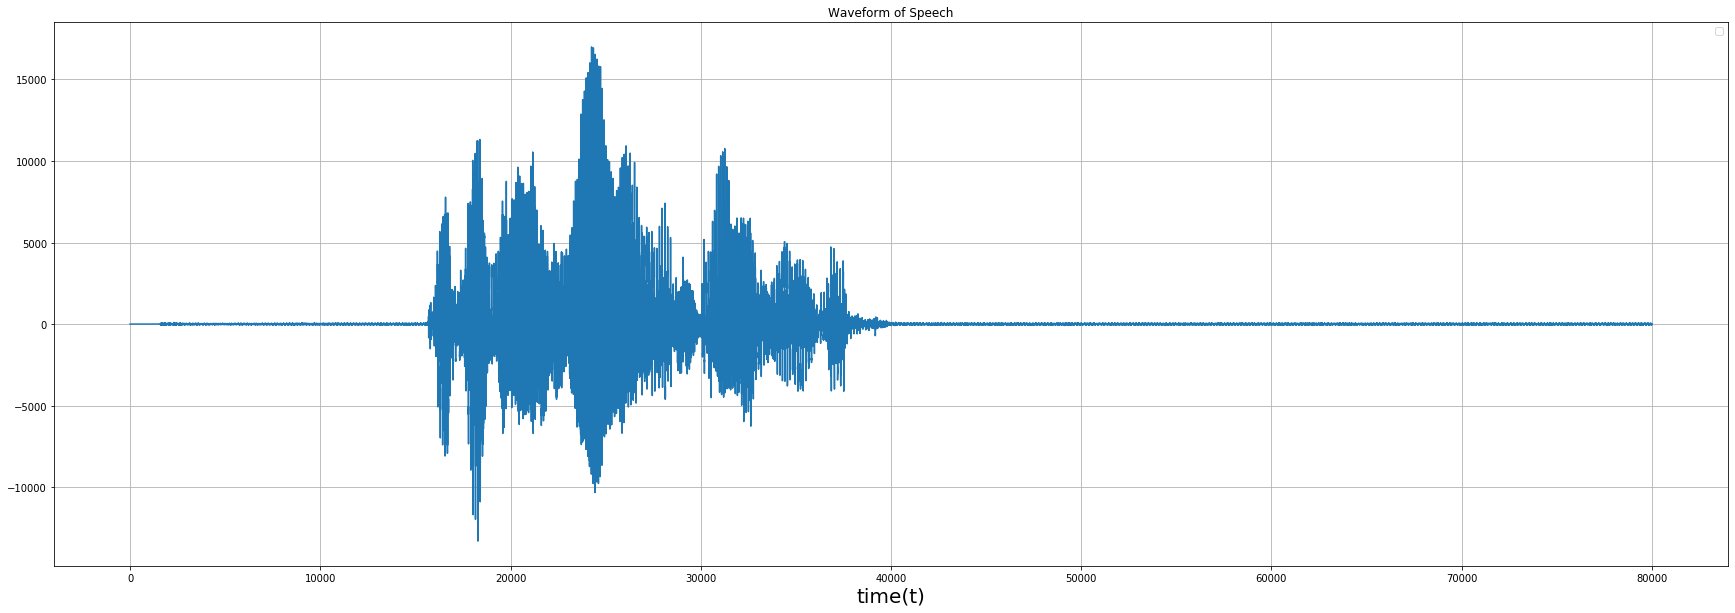

In [88]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

l1, = plt.plot(data)

plt.legend(handles=[l1])
plt.xlabel("time(t)", fontsize=20)
plt.title("Waveform of Speech")
plt.autoscale(axis='x',tight=False)
plt.grid(True)
plt.show()

### Feature 1: Short-Time Fourier Transform

Sound length 80000
Sampling Rate: 16000
Window length 320
Shift length: 160
Num window:  499
FFT N:  1024
Shape of STFT: (499, 1024) 


<Figure size 2160x720 with 0 Axes>

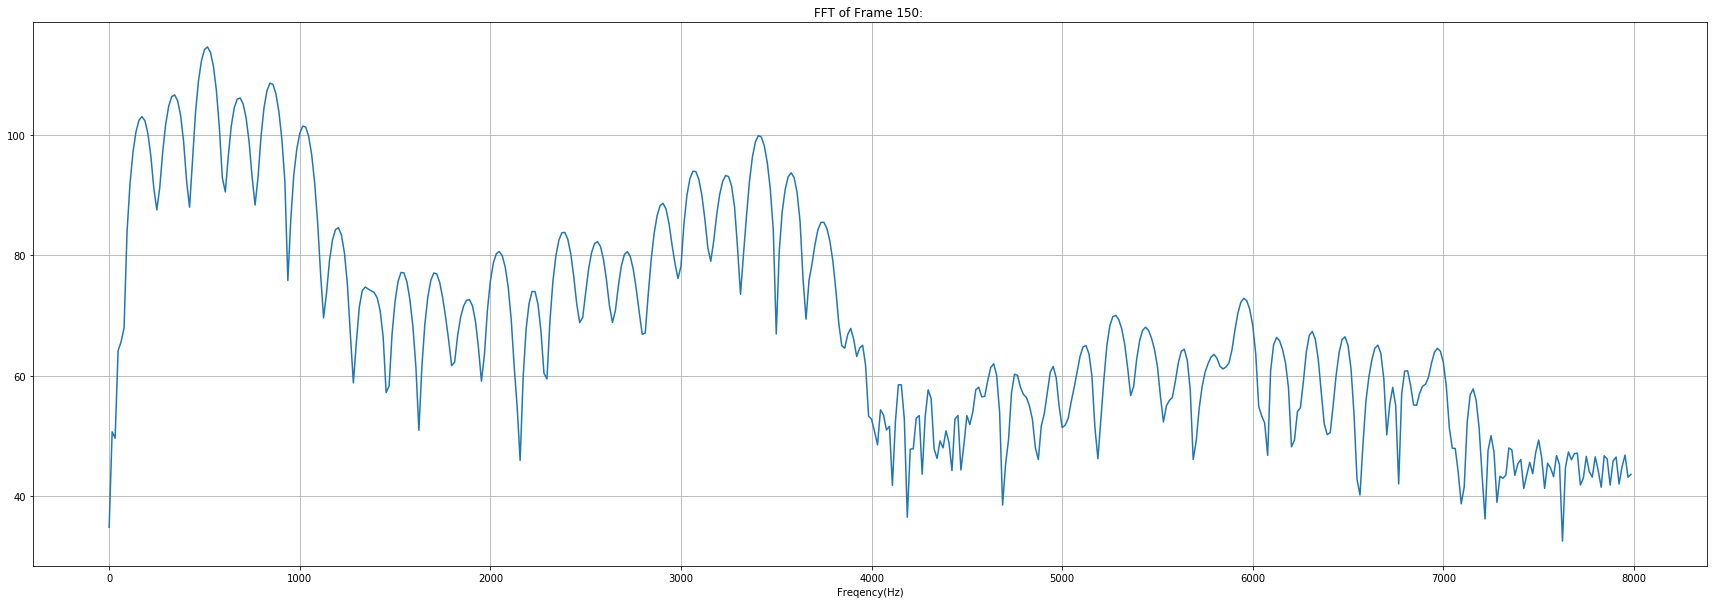

<Figure size 2160x720 with 0 Axes>

In [89]:
speech = SpeechProcessing()
STFT = speech.STFT(data, 1024, fs, window_dur_in_second = 0.02, frame_shift = 0.01, plot = False)
print("Shape of STFT: {} ".format(STFT.shape))

import numpy as np
f = np.arange(0,fs/2,fs/1024)
plt.plot(f,20*np.log10(np.abs(list(STFT[150])[:int(len(list(STFT[150]))/2)])))
plt.grid(True)
plt.title("FFT of Frame 150: ")
plt.xlabel("Freqency(Hz)")
plt.figure()

### Feature 2: Short-Time Energy

Sound length 80000
Sampling Rate: 16000
Window length 320
Shift length: 160
Num window:  499
Shape of Short-Time Energy: (499, 1)


<Figure size 2160x720 with 0 Axes>

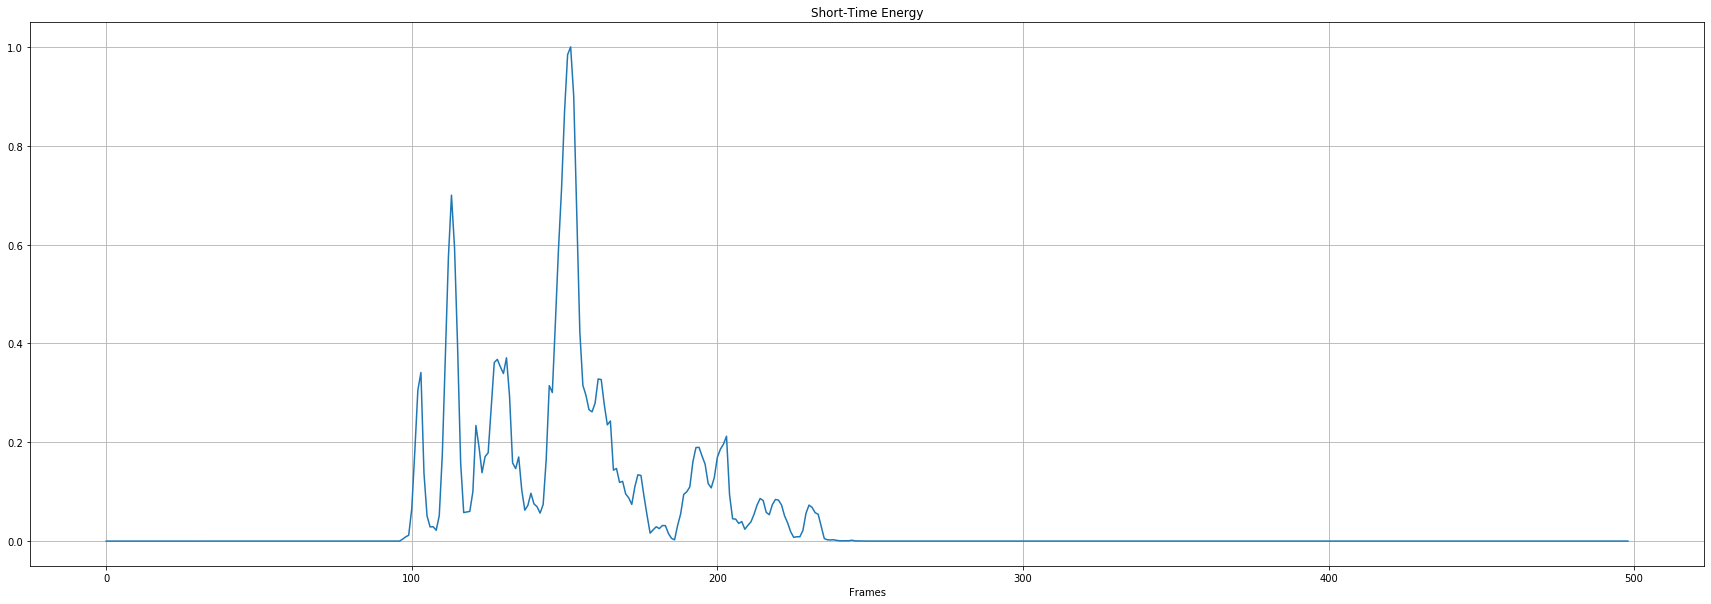

<Figure size 2160x720 with 0 Axes>

In [90]:
windowed_data = speech.window(data, fs, 0.02, 0.01)
shortTimeEnergy = speech.shortTimeEnergy(windowed_data)
print("Shape of Short-Time Energy:",shortTimeEnergy.shape)


plt.plot(shortTimeEnergy.ravel())
plt.grid(True)
plt.title("Short-Time Energy")
plt.xlabel("Frames")
plt.figure()

### Feature 3: Short-Time Zero Crossing

Sound length 80000
Sampling Rate: 16000
Window length 320
Shift length: 160
Num window:  499
Shape of Short-Time Zero Crossing: (499, 1)


<Figure size 2160x720 with 0 Axes>

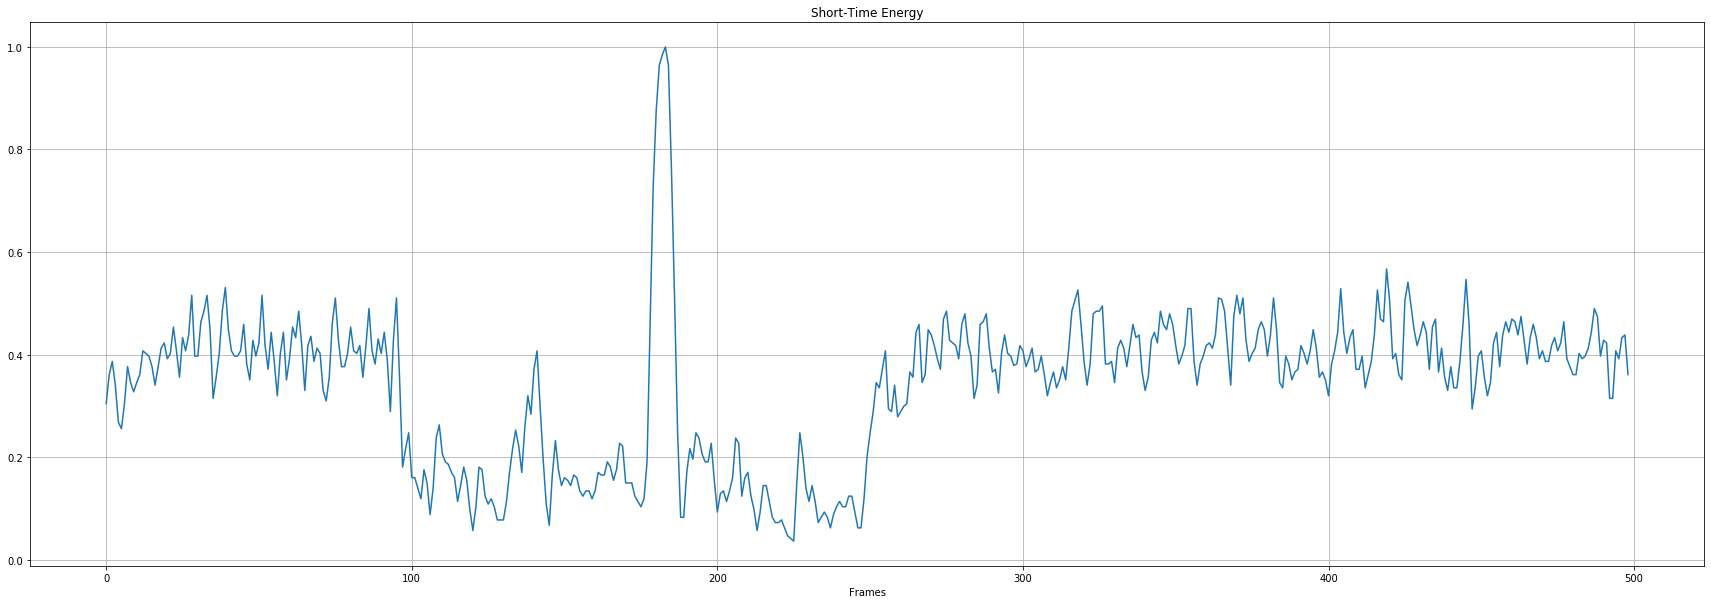

<Figure size 2160x720 with 0 Axes>

In [91]:
windowed_data = speech.window(data, fs, 0.02, 0.01)
shortTimeEnergy = speech.shortTimeZeroCrossing(windowed_data, 0.01, fs)
print("Shape of Short-Time Zero Crossing:",shortTimeEnergy.shape)


plt.plot(shortTimeEnergy)
plt.grid(True)
plt.title("Short-Time Energy")
plt.xlabel("Frames")
plt.figure()

### Feature 4: Real Cepstrum

Sound length 80000
Sampling Rate: 16000
Window length 320
Shift length: 160
Num window:  499
Shape of Real Cepstrum: 499


<Figure size 2160x720 with 0 Axes>

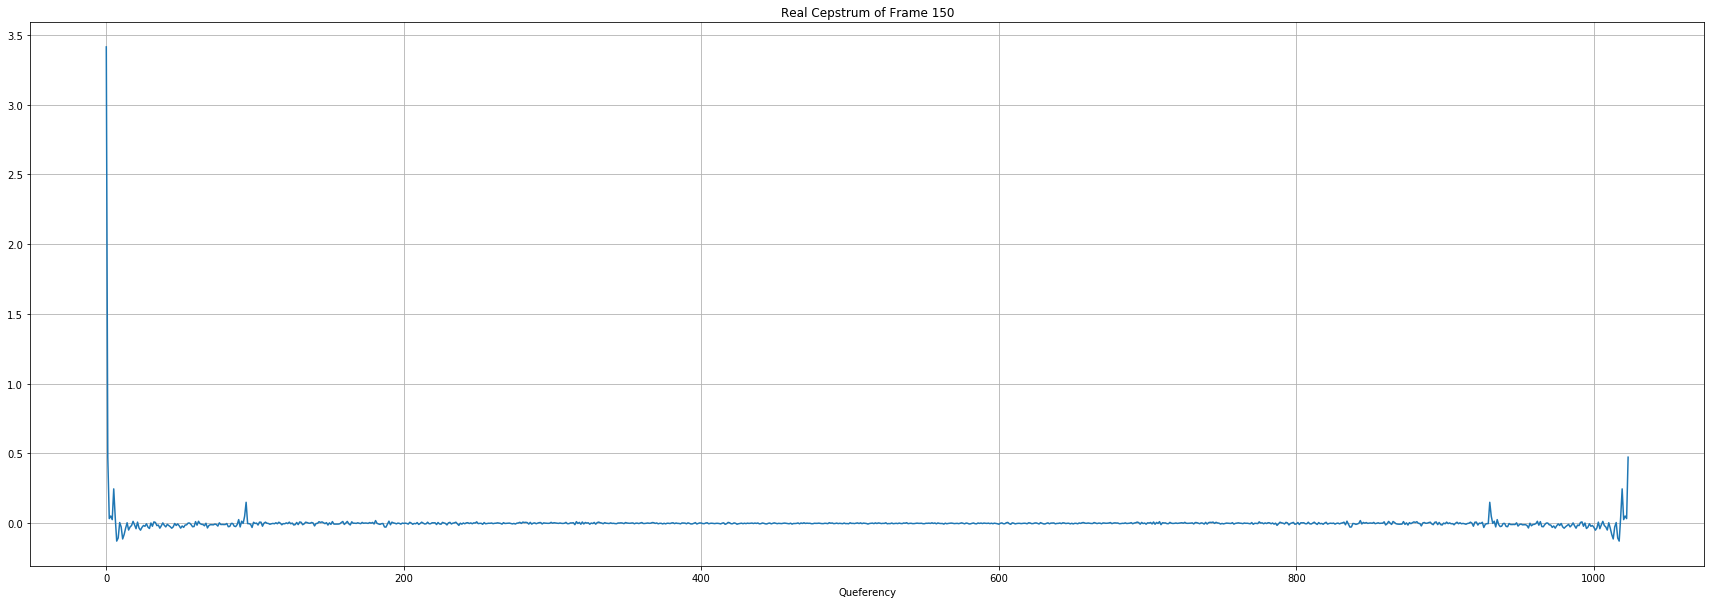

<Figure size 2160x720 with 0 Axes>

In [92]:
cepstrum = speech.cepstrum(data, 1024, fs, window_dur_in_second = 0.02, frame_shift = 0.01, lp_liftering = False, plot = False, cutoff=25)
print("Shape of Real Cepstrum:",len(cepstrum))#list

plt.plot(cepstrum[150])
plt.grid(True)
plt.title("Real Cepstrum of Frame 150")
plt.xlabel("Queferency")
plt.figure()

### Feature 5: Short Time Spectral Envelope with low-time liftering

Sound length 80000
Sampling Rate: 16000
Window length 320
Shift length: 160
Num window:  499
Shape of Short Time Envelope: 499


<Figure size 2160x720 with 0 Axes>

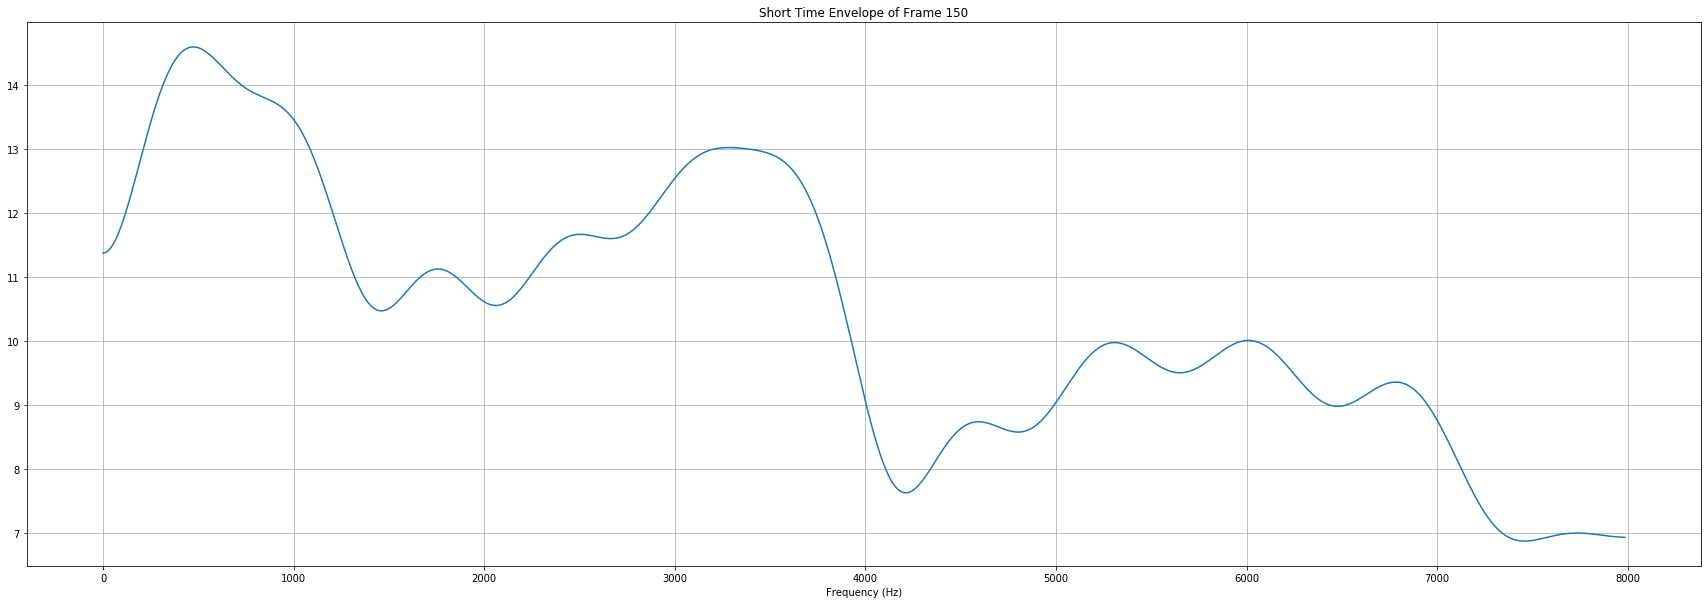

<Figure size 2160x720 with 0 Axes>

In [96]:
cepstrum = speech.cepstrum(data, 1024, fs, window_dur_in_second = 0.02, frame_shift = 0.01, lp_liftering = True, plot = False, cutoff=25)
SpectralEnvelope = speech.shortTimeSpectralEnvelope(cepstrum, 1024)
print("Shape of Short Time Envelope:",len(cepstrum))#list


import numpy as np
f = np.arange(0,fs/2,fs/1024)
plt.plot(f,20*np.log10(np.abs(list(SpectralEnvelope[150])[:int(len(list(SpectralEnvelope[150]))/2)])))
plt.grid(True)
plt.title("Short Time Envelope of Frame 150")
plt.xlabel("Frequency (Hz)")
plt.figure()

In [98]:
import librosa
y, sr = librosa.load(data, offset=30, duration=5)
librosa.feature.mfcc(y=y, sr=sr)

TypeError: Invalid file: array([  0,   0,  -1, ...,  -1, -14, -14], dtype=int16)

In [99]:
data.shape

(80000,)